Table of content
- [Introduction](#1)
- [Edge detection with gradient operators](#2)
  - [Sobel](#2.1)
  - [Kirsch](#2.2)
  - [Prewitt](#2.3)

<h1 style="color:salmon" id="1">Introuduction</h1>

>Edge: defined as curves in a digital image at which the image brightness changes sharply or, more formally, has discontinuities.

- The edges of items in an image hold much of the information in the image
  - location of items
  - their sizes
  - their shapes 
  - texture 
- An edge is where the gray level of the image moves from an area of low values to high values or vice versa. 
- The detected edge is the derivative of the edge, This means it is the slope or rate of change of the gray levels in the edge.
- The slope of the edge is always positive or zero.
- In the ideal case, the result of applying an edge detector to an image may lead to a set of connected curves that indicate the boundaries of objects.
- Applying an edge detection algorithm to an image may significantly reduce the amount of data to be processed.
  - filter out information that may be regarded as less relevant.
  - preserving the important structural properties of an image
- terms and notes: 
- **Mask**: The specific matrix used to detect edges.
- **Operator**: The complete edge-detection method, including all masks and any additional steps (like calculating gradient magnitude).
- **Variation in Values**: Small variations in Sobel mask values are typically due to normalization, scaling, or implementation differences but do not change the fundamental purpose of the Sobel operator.
- What is a Mask?
  - Masksthat aims to amplify the slope of the edge.
  - The Kirsch, Prewitt, and Sobel masks are **compass gradient** or **directional edge detectors**.
    - Each of the **eight masks** detects (variations of each mask) an edge in one direction.   
    - The directional edge detectors can detect an edge in only one of the eight directions.
  - There are two basic principles for each edge detector mask
    - <span style="color:red">**Numbers in the mask must sum to Zero.**</span>
      - So convolving a constant area of pixels that have same values (e.g. all are ones) the gradient would be zero.
      - As there is no change in brightness.
    - <span style="color:red">**The mask should approximate differentiation or amplify the slope of the edge.**</span>

  


<h1 style="color:salmon" id="2">Edge detection with gradient operators</h1>

### Categories of Edge Detection Operators
1. Gradient-Based Operators
  >A **gradient operator** in computer science refers to a weighted convolution operator used to compute the gradient of an image
2. Second-Order Derivative Operators
   - Use the second derivative (e.g., Laplacian) to detect changes in the gradient, focusing on areas of rapid transition.
3. Directional Edge Detection Operators
   - Detect edges in specific directions, allowing for more control over edge orientation.
  
| **Operator**   | **Type**                   | **Kernel Size** | **Directions**       | **Noise Sensitivity** | **Edge Thickness** | **Best Use Case**                          |
|----------------|----------------------------|-----------------|----------------------|------------------------|--------------------|--------------------------------------------|
| **Sobel**      | Gradient-based             | 3x3             | Horizontal, Vertical | Moderate               | Slightly thick     | General-purpose edge detection             |
| **Prewitt**    | Gradient-based             | 3x3             | Horizontal, Vertical | High                   | Slightly thick     | Simple, fast edge detection                |
| **Kirsch**     | Directional gradient-based | 3x3             | 8 directions         | High                   | Thick              | Directional edge detection                 |
| **Laplacian**  | Second-order derivative    | 3x3 or larger   | All directions       | Very high              | Thin               | Detecting fine details                     |
| **Canny**      | Multi-stage gradient-based | Multiple steps  | All directions       | Low                    | Thin               | Precise edge detection with noise reduction |
| **Roberts**    | Gradient-based             | 2x2             | Diagonal             | Very high              | Thin               | Fine detail detection                      |


- Edge detection $\rarr$ is edge differentiation
  - Image gradient  
    - we know that digital image 🖼️ is a discrete 2D functions where at each pixel value we got the intensity. 
    - And an edge is a sudden change in intensity. 
    - Edge would be in the pixel level so we need to calculate the differentiation or the gradient of an image in some local areas of this discerete 2D function.
    - The derivative of a function $f(x)$ with respect to $x$ is the limit difference in $f(x)$ values as **two points get infinitely close.**
    $$
    \huge f'(x) = \lim_{\red{\Delta x \rarr 0}} \frac{f(x+\red{\Delta x}) - f(x)}{\red{\Delta x}}
    $$
    - However, in image processing, we’re dealing with discrete data—pixel intensities at specific locations.
    - We don’t have the luxury of an "infinitely small" change in $x$ or $y$.
    - Instead, we approximate this change using a <span style="color:red">**finite difference**</span>, calculating how the intensity values change between adjacent pixels.
    - In 1D <span style="color:red">**finite difference approximation**</span> to the derivative at a point $x$ can be given by:
    $$
    \huge f'(x) ≈  \frac{f(x+\red{h}) - f(x)}{\red{h}}
    $$
    - where $h$ is a small distance (often just 1 pixel in images).
    - for 2D functions (images)
    - we are interesting in the rate change in both $x$ (horizontal) and $y$ (vertical) directions (partial derivatives).
    $$
    \huge ∇f(\green x,\blue y) = [\frac{\partial f}{\partial \green x}, \frac{\partial f}{\partial \blue y}] 
    $$
    - Finite Differences for 2D Gradients
    1. Partial erivative with respect to $x$ horizontal change (h=1, one pixel).
      $$
      \huge \frac{\partial f}{\partial \green x} ≈ \frac{f(x+\red{h}, y) - f(x,y)}{\red{h}} = f(x+\red{1}, y) - f(x,y)
      $$
    2. Partial erivative with respect to $y$ horizontal change (h=1, one pixel).
      $$
      \huge \frac{\partial f}{\partial \green y} ≈ \frac{f(x, y+\red{h}) - f(x,y)}{\red{h}} = f(x, y+\red{1}) - f(x,y)
      $$
  - So simply to calculate the change in one direction, we take the difference between the pixels in that directions.
    - Because we are just approximating the gradient at that direction.
    - That is why **gradient operators need a mask for each direction**.
  - We can know the gradient magnitude after finding both partial derivatives.
    - gradient magnitude is jus the second norm of the $∇f(\green x,\blue y)$
    $$
    \huge G(\green x,\blue y) = \sqrt{(\frac{\partial f}{\partial \green x})^2+(\frac{\partial f}{\partial \blue y})^2}
    $$
    - And the oriantation (angle) 
    $$
    \huge \tan^{-1}(\frac{\frac{\partial f}{\partial \green x}}{\frac{\partial f}{\partial \blue y}})
    $$
  - Thoses differences can be gathered in a mask and use that mask to convolve an image.



<h2 style="color:skyblue" id="2.1">Sobel</h2>

- The operator uses two `3×3` kernels which are convolved with the original image to calculate approximations of the derivatives.
  - one for horizontal changes, and one for vertical.
- If we define $A$ as the source image, and $G_x$ and $G_y$ are two images which at each point contain the horizontal and vertical derivative approximations respectively.
$$
\huge G_x = 
\begin{pmatrix} 
+1 & 0 & -1 \\
+2 & 0 & -2 \\
+1 & 0 & -1 \\
\end{pmatrix} * A

$$
$$
\huge G_y = 
\begin{pmatrix} 
+1 & +2 & +1 \\
0 & 0 & 0 \\
-1 & -2 & -1 \\
\end{pmatrix} * A

$$
$$
\huge
G = \sqrt{G_x^2 + G_y^2}
$$
$$
\huge
\theta = \tan^{-1} (\frac{G_y}{G_x})
$$
- There are shapes of the sobel kerenl but all of them have three 0s in the same line, and of course elments sum to zero.
- The Sobel operator consists of two separable operations
- Smoothing perpendicular to the derivative direction with a triangle filter 
  - $h(-1)=1, h(0)=2, h(1)=1$ (plot to imagine)
- Simple central difference in the derivative direction
  - $h'(-1)=0, h'(0)=0, h'(1)=-1$
  
  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg 
import cv2 as cv 

In [11]:
img = mpimg.imread("../images/pyramid.jpg")

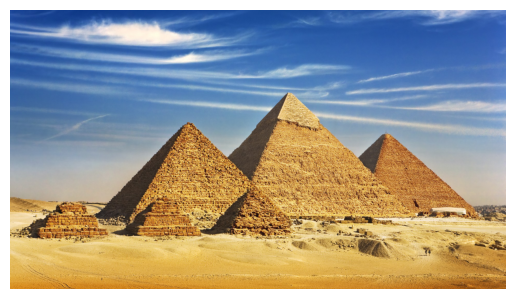

In [13]:
def plot_image(img, cmap=None):
    if cmap: 
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
plot_image(img)

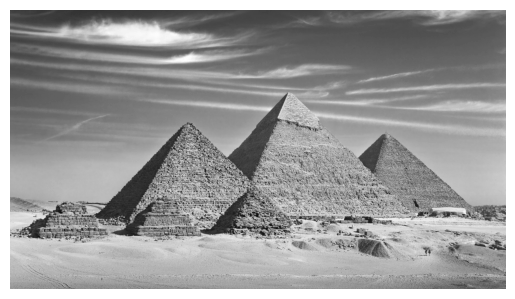

In [16]:
def RGB_to_gray(img):
    return np.dot(img[:, :, :3], [0.2989, 0.5870, 0.1140])
img_gray = RGB_to_gray(img)
plot_image(img_gray, cmap="gray")


In [19]:
sobel_x = np.array(
    [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ]
)
sobel_y = np.array(
    [
    [-1, -2, -1], 
    [0, 0, 0],
    [1, 2, 1]
    ]
)
sobel_x_ref = -1 * sobel_x
sobel_y_ref = -1 * sobel_y
sobel_x, sobel_y, sobel_x_ref, sobel_y_ref

(array([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]]),
 array([[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]),
 array([[ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]]),
 array([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]]))

In [22]:
img_gray.shape

(1080, 1920)

the shape of the G_x image:  (1080, 1920)


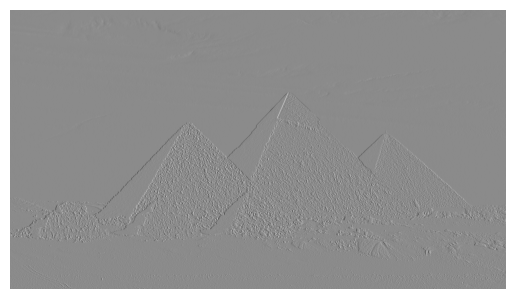

In [25]:
# filter2d function apply a custom filter to an image by performing a convolution operation between the image and a kernel
gradient_x = cv.filter2D(img_gray, -1, sobel_x)
print("the shape of the G_x image: ", gradient_x.shape)
plot_image(gradient_x, cmap="gray")

the shape of the G_y image:  (1080, 1920)


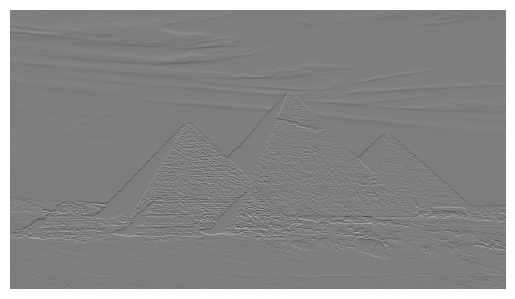

In [26]:
gradient_y = cv.filter2D(img_gray, -1, sobel_y)
print("the shape of the G_y image: ", gradient_y.shape)
plot_image(gradient_y, cmap="gray")

In [38]:
gradient_x.dtype

dtype('float64')

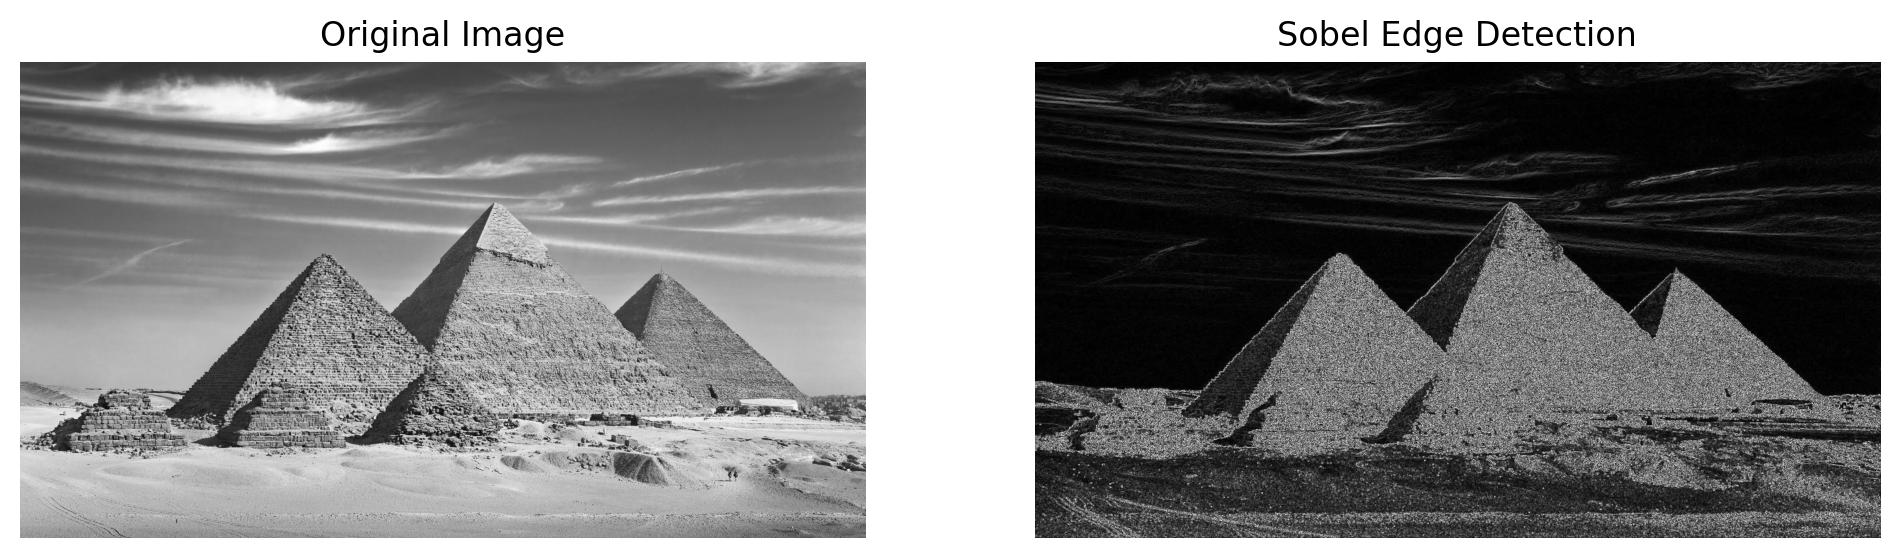

In [47]:
# Compute the gradient magnitude (edge magnitude)
gradient_magnitude = cv.magnitude(gradient_x, gradient_y)

# Convert the gradient magnitude to uint8 (for visualization)
gradient_magnitude = np.uint8(np.absolute(gradient_magnitude))

# Display the original image and the edge-detected image
plt.figure(figsize=(12,12), dpi=200)
plt.subplot(1, 2, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Original Image')
plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Sobel Edge Detection')
plt.axis("off")
plt.show()